In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [3]:
data.loc[data["country"] == "Kenya", "country"] = 0
data.loc[data["country"] == "Rwanda", "country"] = 1
data.loc[data["country"] == "Tanzania", "country"] = 2
data.loc[data["country"] == "Uganda", "country"] = 3

data.loc[data["bank_account"] == "No", "bank_account"] = 0
data.loc[data["bank_account"] == "Yes", "bank_account"] = 1

data.loc[data["location_type"] == "Rural", "location_type"] = 0
data.loc[data["location_type"] == "Urban", "location_type"] = 1

data.loc[data["cellphone_access"] == "No", "cellphone_access"] = 0
data.loc[data["cellphone_access"] == "Yes", "cellphone_access"] = 1

data.loc[data["gender_of_respondent"] == "Male", "gender_of_respondent"] = 0
data.loc[data["gender_of_respondent"] == "Female", "gender_of_respondent"] = 1

data.loc[data["marital_status"] == "Married/Living together", "marital_status"] = 0
data.loc[data["marital_status"] == "Widowed", "marital_status"] = 1
data.loc[data["marital_status"] == "Single/Never Married", "marital_status"] = 2
data.loc[data["marital_status"] == "Divorced/Seperated", "marital_status"] = 3
data.loc[data["marital_status"] == "Dont know", "marital_status"] = 4

data.loc[data["education_level"] == "No formal education", "education_level"] = 0
data.loc[data["education_level"] == "Primary education", "education_level"] = 1
data.loc[data["education_level"] == "Vocational/Specialised training", "education_level"] = 2
data.loc[data["education_level"] == "Secondary education", "education_level"] = 3
data.loc[data["education_level"] == "Tertiary education", "education_level"] = 4
data.loc[data["education_level"] == "Other/Dont know/RTA", "education_level"] = 5

data.loc[data["job_type"] == "No Income", "job_type"] = 9
data.loc[data["job_type"] == "Dont Know/Refuse to answer", "job_type"] = 8
data.loc[data["job_type"] == "Informally employed", "job_type"] = 7
data.loc[data["job_type"] == "Other Income", "job_type"] = 6
data.loc[data["job_type"] == "Self employed", "job_type"] = 5
data.loc[data["job_type"] == "Farming and Fishing", "job_type"] = 4
data.loc[data["job_type"] == "Remittance Dependent", "job_type"] = 3
data.loc[data["job_type"] == "Formally employed Government", "job_type"] = 1
data.loc[data["job_type"] == "Formally employed Private", "job_type"] = 2
data.loc[data["job_type"] == "Government Dependent", "job_type"] = 0


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null int64
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null int64
location_type             23524 non-null int64
cellphone_access          23524 non-null int64
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null int64
relationship_with_head    23524 non-null object
marital_status            23524 non-null int64
education_level           23524 non-null int64
job_type                  23524 non-null int64
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


In [4]:
#Encoding object feature  country 
#uniqueid bank_account location_type cellphone_access 
#location_type job_type  education_level marital_status 
# relationship_with_head
import matplotlib.pyplot as plt

In [5]:
def bar_chart(feature):
    survived = data[data['bank_account']==1][feature].value_counts()
    dead = data[data['bank_account']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Bank account','not Bank account']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [6]:
bar_chart('country')

In [7]:
bar_chart('location_type')

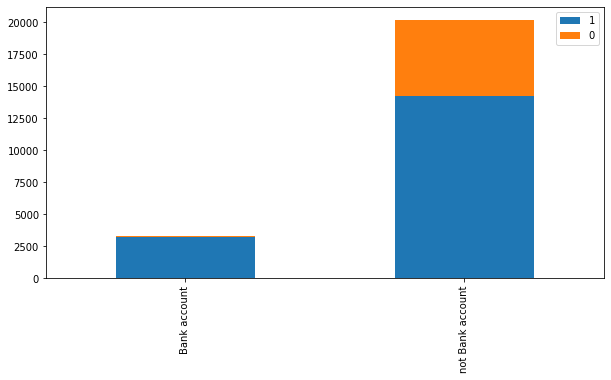

In [8]:
bar_chart('cellphone_access')      

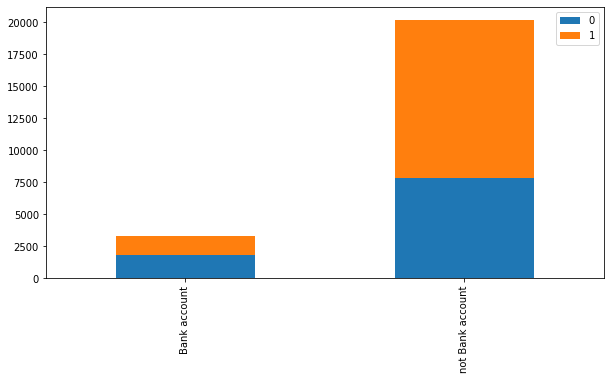

In [9]:
bar_chart('gender_of_respondent')  

In [10]:
y = data.pop("bank_account")

In [11]:
numerica_variable = list(data.dtypes[data.dtypes != "object"].index)
data[numerica_variable].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
country                 23524 non-null int64
year                    23524 non-null int64
location_type           23524 non-null int64
cellphone_access        23524 non-null int64
household_size          23524 non-null int64
age_of_respondent       23524 non-null int64
gender_of_respondent    23524 non-null int64
marital_status          23524 non-null int64
education_level         23524 non-null int64
job_type                23524 non-null int64
dtypes: int64(10)
memory usage: 1.8 MB


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(data[numerica_variable],y,test_size = 0.2)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train =scl.fit_transform(X_train)
X_test  =scl.fit_transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
model =RandomForestClassifier()
model.fit(X_train,y_train)
y_prediction = model.predict(X_test)
y_prediction


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [17]:
accuracy_score(y_test,y_prediction)

0.8656748140276301

In [18]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
svc =SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.8839532412327311